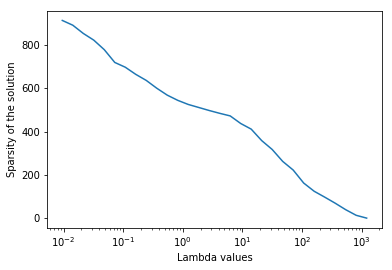

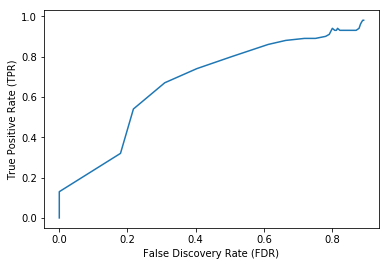

In [3]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import itertools

def fn_opt(X,w,y,b,lmd):
    b_mat = np.reshape(b*np.ones(len(X)),(len(X),1))
    val = np.matmul(X,w)+b_mat-y
    return np.sum(val*val) + lmd * np.sum(np.absolute(w))

# w is a 1 by d matrix
# X is a n by d matrix
# y is a n by 1 matrix
# delta is the error parameter

def lasso_fixlmd(X,w,y,lmd,delta):
    diff = delta + 1
    # delta determines the stopping condition
    while diff > delta:
        b = np.sum(y-np.matmul(X,w))/len(X)
        b_mat = np.reshape(b*np.ones(len(X)),(len(X),1))
        curr_fn_val = fn_opt(X,w,y,b,lmd)
        diff = 0
        for k in range(len(X[0])):
            a = 2*np.dot(X[:,k],X[:,k])
            btemp = y-(b_mat+np.matmul(X,w)-w[k][0]*np.reshape(X[:,k],(len(X),1)))
            c = 2*np.sum(np.reshape(X[:,k],(len(X),1))*btemp)
            if c < -1*lmd:
                diff = max(diff,np.absolute(w[k][0]-(c+lmd)/a))
                w[k][0] = (c+lmd)/a
            elif c > lmd:
                diff = max(diff,np.absolute(w[k][0]-(c-lmd)/a))
                w[k][0] = (c-lmd)/a
            else:
                diff = max(diff,np.absolute(w[k][0]))
                w[k][0] = 0
        new_fn_val = fn_opt(X,w,y,b,lmd)
        # a sanity check ensuring that the value of the objective function does not increase
        if new_fn_val - curr_fn_val > 0:
            return
    
    return w,new_fn_val

# executes the coordinate descent algorithm with various values of lambda (the regularization constant)

def lasso(X,y,k_opt):
    yscale = y - np.reshape((np.sum(y)/len(y))*np.ones(len(y)),(len(y),1))
    # we first find the value of lmd such that the optimum value of w is the all zeros vector
    lmd = 0
    for k in range(len(X[0])):
        lmd = max(lmd,np.absolute(np.sum(yscale*np.reshape(X[:,k],(len(X),1)))))
    lmd = 2*lmd
    w = np.reshape(np.zeros(len(X[0])),(len(X[0]),1))
    
    delta = 0.00001
    
    #we now compute the function value, fdr, tpr for every fixing of lmd
    fnvallist = []
    wlist = []
    lmdlist = []
    fdrlst = []
    tprlst = []
    cnt = 0
    while cnt <= 900:
        w,fn_val = lasso_fixlmd(X,w,y,lmd,0.0001)
        nzcount = np.count_nonzero(w)
        cnt = nzcount
        nztruecount = np.count_nonzero(w[:k_opt])
        #print(nzcount,nztruecount)
        wlist.append(nzcount)
        if nzcount == 0:
            fdrlst.append(0)
        else:
            fdrlst.append((nzcount-nztruecount)/nzcount)
        tprlst.append(nztruecount/k_opt)
        fnvallist.append(fn_val)
        lmdlist.append(lmd)
        lmd = lmd/1.5
    
    return fnvallist,wlist,lmdlist,fdrlst,tprlst

# the function that generates the input data

def generate_data(n,d,k,sgm):
    X = np.random.normal(0,1,(n,d))
    eps = np.random.normal(0,sgm,(n,1))
    w = np.zeros(d)
    for i in range(k):
        w[i] = i/k
    w = np.reshape(w,(d,1))
    y = np.matmul(X,w)+eps
    return X,y

X,y = generate_data(500,1000,100,1)

fl,wl,ll,fdr,tpr = lasso(X,y,100)

#nzerol = wl
#for i in range(len(wl)):
#    nzerol.append(np.count_nonzero(wl[i]))
    
# sorting the lists simultaneously for the plot between values of lambda and the sparsity of w
lists = sorted(zip(*[ll,wl]))
new_ll, new_wl = list(zip(*lists))
plt.figure(1)
plt.plot(new_ll,new_wl)
plt.xscale('log')
plt.xlabel('Lambda values')
plt.ylabel('Sparsity of the solution')
plt.show()

# sorting the lists simultaneously for the plot between FDR and TPR
lists = sorted(zip(*[fdr,tpr]))
new_fdr, new_tpr = list(zip(*lists))
plt.figure(2)
plt.xlabel('False Discovery Rate (FDR)')
plt.ylabel('True Positive Rate (TPR)')
plt.plot(new_fdr,new_tpr)
plt.show()

In [2]:
import numpy as np

a = [1,2,3]

print(a)
print(np.reshape(a,(1,3)))
print(np.reshape(a,(3,1)))
print(np.dot(a,a))
print(np.reshape(a,(len(a),1))*np.reshape(a,(len(a),1)))

b = np.ones(4)
print(b)
print(3*b)
print(np.reshape(3*b,(4,1)))

X = np.zeros(10)
X = np.reshape(X,(5,2))
print(1+X[:,1])


x = [1,0,4,0,2]
print(x)
print(np.count_nonzero(x))

alist = []
print(alist)
alist.append(a)
alist.append(b)
print(alist)
print(np.count_nonzero(alist[0]), np.count_nonzero(alist[1]))

blist = []
for i in range(10):
    j = i
    blist.append(j)
print(blist)

#Be careful about appending lists
#https://stackoverflow.com/questions/47236559/python-append-list-only-gets-last-value

M = [1,2,3,4,5,6]
M = np.reshape(M,(6,1))
print(M)
print(M[:2])

#Drawing multiple plots
#https://stackoverflow.com/questions/42595052/show-2-plots-at-same-time-instead-of-one-after-another-in-matplotlib

[1, 2, 3]
[[1 2 3]]
[[1]
 [2]
 [3]]
14
[[1]
 [4]
 [9]]
[1. 1. 1. 1.]
[3. 3. 3. 3.]
[[3.]
 [3.]
 [3.]
 [3.]]
[1. 1. 1. 1. 1.]
[1, 0, 4, 0, 2]
3
[]
[[1, 2, 3], array([1., 1., 1., 1.])]
3 4
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1]
 [2]]
